In [2]:
import json

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from wordcloud import WordCloud

from Document import load_documents

# Exploring the training data

We have the following features:
- ids (string)
- comment_text (string)
- toxic (boolean)
- severe_toxic (boolean)
- obscene (boolean)
- threat (boolean)
- insult (boolean)
- identity_hate (boolean)


In [3]:
df = pd.read_csv('../data/kaggle/train.csv')
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


## Amount of Rows / Length

In [4]:
total = len(df)
total

159571

In [5]:
is_toxic = df[df['toxic'] == 1]
total_is_toxic = len(is_toxic)

is_severe_toxic = df[df['severe_toxic'] == 1]
total_is_severe_toxic = len(is_severe_toxic)

is_obscene = df[df['obscene'] == 1]
total_is_obscene = len(is_obscene)

is_threat = df[df['threat'] == 1]
total_is_threat = len(is_threat)

is_insult = df[df['insult'] == 1]
total_is_insult = len(is_insult)

is_identity_hate = df[df['identity_hate'] == 1]
total_is_identity_hat = len(is_identity_hate)

total_not_toxic = total - total_is_toxic

In [6]:
# Plotting config
sns.set_style(
    'darkgrid')  # darkgrid, white grid, dark, white and ticksplt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)  # fontsize of the tick labels
plt.rc('ytick', labelsize=13)  # fontsize of the tick labels
plt.rc('legend', fontsize=13)  # legend fontsize
plt.rc('font', size=13)  # controls default text sizes

sns.color_palette("flare")

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

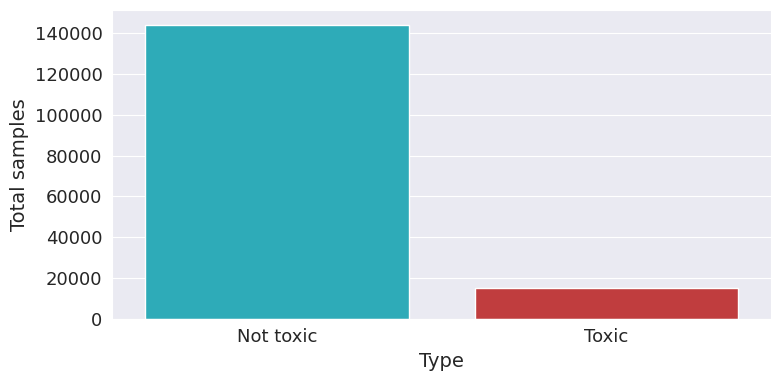

In [7]:
df_classes = df[["id", "toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]

palette = {
    "Not toxic":"tab:cyan",
    "toxic":"tab:red", 
}

# df_long = pd.melt(df_classes, id_vars='id',
#                  value_vars=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])

df_long = pd.melt(df_classes, id_vars='id', value_vars=['toxic'])

grouped = df_long.groupby('variable', as_index=False).sum(numeric_only=True)

add_data = pd.DataFrame.from_dict({'variable': ['Not toxic'], 'value': [total_not_toxic]})
grouped = pd.concat([grouped, add_data], ignore_index=True)

grouped = grouped.sort_values(by='value', ascending=False)

plt.figure(figsize=(8, 4), tight_layout=True)
ax = sns.barplot(x=grouped['variable'], y=grouped['value'], palette=palette, errorbar=None)
ax.set(title='', xlabel='Type', ylabel='Total samples')

labels = [item.get_text().capitalize() for item in ax.get_xticklabels()]
# labels[4] = 'Severe \ntoxic'
# labels[5] = 'Identity \nhate'
ax.set_xticklabels(labels)

# plt.yscale('log')

ax.yaxis.set_major_formatter(ScalarFormatter())

plt.show()

In [8]:
# model = '1679576926'
# model = '1679575993'
# model = '1679580814'
# model = '1679581240'
# model = 'smallerTestSize'
# model = 'test30StopwordRemoval'
model = 'fully_trained_model2'

model_scores_df = pd.read_csv(f'../logs/{model}/model_scores.csv', sep=';')

model_scores_df.head()

,total_samples,training_loss,training_accuracy,validation_loss,validation_accuracy,test_loss,test_accuracy,test_f1_score
0,500,0.686077,0.637778,0.687902,0.644,0.682008,0.7760,0.269025
1,1000,0.675566,0.715111,0.678868,0.696,0.703556,0.3168,0.215948
2,1500,0.656388,0.686222,0.679014,0.540,0.679162,0.5076,0.242537
3,2000,0.636675,0.788000,0.651930,0.732,0.607796,0.8156,0.408983
4,2500,0.602598,0.822667,0.619597,0.788,0.576003,0.7936,0.428129


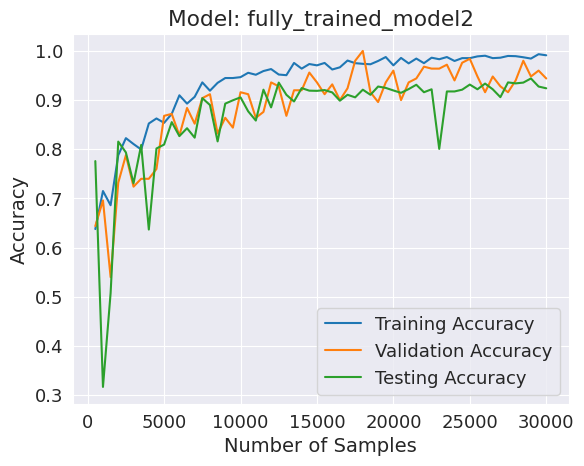

In [12]:
plt.plot('total_samples', 'training_accuracy', data=model_scores_df, label='Training Accuracy')
plt.plot('total_samples', 'validation_accuracy', data=model_scores_df, label='Validation Accuracy')
plt.plot('total_samples', 'test_accuracy', data=model_scores_df, label='Testing Accuracy')

plt.legend()
plt.title("Model: " + model)
plt.ylabel('Accuracy')
plt.xlabel('Number of Samples')

plt.show()

## Stopword Removal
Removing the stopwords based on the [NLTK list](https://gist.github.com/sebleier/554280) of english stopwords removes ~150 words (=152 words less when comparing 30kStopwordRemovalLowerCase and Test30 experiments). 


In [9]:
with open(f'../logs/{model}/data/bag_of_words.json') as file:
    bag_of_tokens = json.load(file)

documents = load_documents("../data/kaggle/train.csv")

text = ""
for document in documents:
    text += document.content + " "

wordcloud = WordCloud(stopwords={"the"}).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
plt.show()

IndexError: list index out of range